In [4]:
import pandas as pd
path='data/'
filename= path+'Default.xlsx'
default_data=pd.read_excel(filename)

default_data.describe()


,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [10]:
default_data.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [12]:
default_data.tail()

,default,student,balance,income
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365
10000,No,Yes,200.922183,16862.952321


In [20]:
default_factor = default_data.default.factorize()[0]
print(default_factor)
default_data['default_factor']= default_factor
default_data.head()


[0 0 0 ... 0 0 0]


,default,student,balance,income,default_factor
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


In [26]:
from sklearn.linear_model import LogisticRegression
X = default_data[['balance']]
y = default_data['default_factor']
lr = LogisticRegression()
lr.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
print(lr.intercept_)
print(lr.coef_)

[-9.46506555]
[[0.00478248]]


In [35]:
import numpy as np
X_pred = np.array([1500, 2000])
print(X_pred)

[1500 2000]


In [42]:
X_pred = X_pred.reshape(2,1)


In [45]:
print(lr.predict_proba(X_pred))

[[0.90815806 0.09184194]
 [0.4750484  0.5249516 ]]


In [59]:
new_vector = np.linspace(start=0,stop=3000,num=100).reshape(-1,1)
y_pred = lr.predict_proba(new_vector)
new_vector.shape


(100, 1)

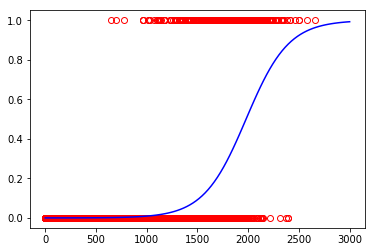

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,y,'or',mfc='none');
plt.plot(new_vector,y_pred[:,1],'-b')

In [69]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X)
confusion_matrix(y,y_pred)

array([[9639,   28],
       [ 246,   87]], dtype=int64)

In [74]:
y_pred = (lr.predict_proba(X)[:,1]>0.03)*1
confusion_matrix(y,y_pred)

array([[7988, 1679],
       [  26,  307]], dtype=int64)

In [78]:
default_data['student_factor'] = default_data.student.factorize()[0]
default_data.head(3)

,default,student,balance,income,default_factor,student_factor
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0


In [83]:
X= default_data[['balance','income','student_factor']]
y= default_data['default_factor']
lr=LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
print(lr.intercept_)
print(lr.coef_)

[-1.94179681e-06]
[[ 4.07583928e-04 -1.25881515e-04 -2.51031353e-06]]


In [89]:
X_pred = np.array([1500,20000,1,1500,25000,1]).reshape(2,3)
lr.predict_proba(X_pred)

array([[0.87059827, 0.12940173],
       [0.92660465, 0.07339535]])

In [92]:
import statsmodels.formula.api as smf
lr = smf.Logit.from_formula(formula = "default_factor~balance+income",data=default_data).fit()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


In [94]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         default_factor   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 08 Nov 2018   Pseudo R-squ.:                  0.4594
Time:                        20:36:42   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""